In [3]:
!pip install tensorflow tensorflow-gpu opencv-python mediapipe sklearn matplotlib

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Dell\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=bf689004cd10a60882f83b99cc17d04da3597d44272749a261304790f9e54a31
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [6]:
!pip install --user mediapipe

  Using cached mediapipe-0.8.11-cp39-cp39-win_amd64.whl (49.0 MB)
  Using cached opencv_contrib_python-4.6.0.66-cp36-abi3-win_amd64.whl (42.5 MB)


In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities


In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:

draw_landmarks(frame, results)


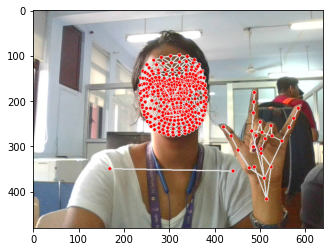

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [9]:
# print(len(results.right_hand_landmarks.landmark))
print(len(results.face_landmarks.landmark))
print(len(results.left_hand_landmarks.landmark))

468
21


In [10]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [6]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

NameError: name 'results' is not defined

In [12]:
face

array([ 0.4980067 ,  0.44657689, -0.04054251, ...,  0.5606665 ,
        0.31784305,  0.03222032])

In [13]:
pose

array([ 4.78059709e-01,  4.10295218e-01, -7.06673265e-01,  9.99999285e-01,
        5.06262481e-01,  3.45174104e-01, -6.51873946e-01,  9.99998391e-01,
        5.23225904e-01,  3.46259266e-01, -6.51312411e-01,  9.99998808e-01,
        5.39489985e-01,  3.48103791e-01, -6.50642931e-01,  9.99998331e-01,
        4.49912846e-01,  3.49013716e-01, -6.51712894e-01,  9.99997795e-01,
        4.30231512e-01,  3.51749867e-01, -6.50612533e-01,  9.99997497e-01,
        4.13025320e-01,  3.55511010e-01, -6.50735974e-01,  9.99996126e-01,
        5.62565446e-01,  3.86594683e-01, -3.06401193e-01,  9.99998391e-01,
        3.94676924e-01,  3.95285070e-01, -3.21329176e-01,  9.99998212e-01,
        5.15146255e-01,  4.82740998e-01, -5.83914638e-01,  9.99997258e-01,
        4.48386520e-01,  4.85367864e-01, -5.87447584e-01,  9.99997795e-01,
        6.89149499e-01,  7.39241421e-01, -1.16356336e-01,  9.99842644e-01,
        2.64527351e-01,  7.28404224e-01, -2.04457521e-01,  9.99427736e-01,
        7.91887701e-01,  

In [14]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
lh

array([ 7.97551155e-01,  7.71130860e-01, -7.38249568e-08,  7.45764554e-01,
        7.24758029e-01, -2.00858079e-02,  7.07810342e-01,  6.41884089e-01,
       -2.84210239e-02,  6.82983994e-01,  5.78014910e-01, -3.77522260e-02,
        6.57611728e-01,  5.37187219e-01, -4.56335433e-02,  7.53993690e-01,
        5.54876208e-01, -1.05071403e-02,  7.59728312e-01,  4.71137077e-01,
       -2.66445298e-02,  7.61812747e-01,  4.21671212e-01, -3.29204090e-02,
        7.63055444e-01,  3.77765179e-01, -3.76188122e-02,  7.89092720e-01,
        5.61570644e-01, -1.30278729e-02,  7.84142375e-01,  5.12935758e-01,
       -5.65381572e-02,  7.69150615e-01,  5.76539338e-01, -6.74443766e-02,
        7.59727418e-01,  6.27883017e-01, -6.32163435e-02,  8.23959351e-01,
        5.77746749e-01, -1.87854506e-02,  8.21792364e-01,  5.29372394e-01,
       -6.28529862e-02,  8.00980091e-01,  5.89977086e-01, -6.19085431e-02,
        7.86191523e-01,  6.36426270e-01, -4.77028415e-02,  8.58053625e-01,
        6.00375056e-01, -

In [7]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])


In [17]:
result_test = extract_keypoints(results)

In [18]:
result_test

array([ 0.47805971,  0.41029522, -0.70667326, ...,  0.        ,
        0.        ,  0.        ])

In [19]:
np.save('0', result_test)

In [20]:
np.load('0.npy')

array([ 0.47805971,  0.41029522, -0.70667326, ...,  0.        ,
        0.        ,  0.        ])

In [8]:
# os.chdir('C:\\Users\\Dell\\Desktop\\SEM_6_miniproject')
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('data') 

# Actions that we try to detect
actions = np.array(['hello', 'thankyou', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [17]:
for action in actions: 
#     dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
            print("working")
        except:
            pass

working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working


In [16]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
   
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break   
    cap.release()
    cv2.destroyAllWindows()

In [18]:
!pip install sklearn

  Using cached sklearn-0.0-py2.py3-none-any.whl


In [8]:
from sklearn.model_selection import train_test_split

In [41]:
label_map = {label:num for num, label in enumerate(actions)}

In [42]:
label_map

{'hello': 0, 'thankyou': 1, 'iloveyou': 2}

In [43]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [44]:
np.array(sequences).shape

(90, 30, 1662)

In [45]:
np.array(labels).shape

(90,)

In [46]:
X = np.array(sequences)

In [47]:
X.shape

(90, 30, 1662)

In [50]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(labels).astype(int)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [52]:
y_test.shape

(5, 3)

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [10]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [11]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [56]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [57]:
model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback])

Epoch 1/100
3/3 [==============================] - 17s 2s/step - loss: 1.8191 - categorical_accuracy: 0.3529
Epoch 2/100
3/3 [==============================] - 1s 461ms/step - loss: 25.7437 - categorical_accuracy: 0.3059
Epoch 3/100
3/3 [==============================] - 1s 222ms/step - loss: 4.3531 - categorical_accuracy: 0.3765
Epoch 4/100
3/3 [==============================] - 1s 160ms/step - loss: 4.7254 - categorical_accuracy: 0.3176
Epoch 5/100
3/3 [==============================] - 1s 171ms/step - loss: 9.2031 - categorical_accuracy: 0.2706
Epoch 6/100
3/3 [==============================] - 0s 147ms/step - loss: 4.6523 - categorical_accuracy: 0.3647
Epoch 7/100
3/3 [==============================] - 1s 205ms/step - loss: 7.0606 - categorical_accuracy: 0.3765
Epoch 8/100
3/3 [==============================] - 1s 230ms/step - loss: 5.9897 - categorical_accuracy: 0.3412
Epoch 9/100
3/3 [==============================] - 0s 135ms/step - loss: 10.1958 - categorical_accuracy: 0.4118
E

In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 30, 64)            442112    
_________________________________________________________________
lstm_13 (LSTM)               (None, 30, 128)           98816     
_________________________________________________________________
lstm_14 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

In [59]:
res = model.predict(X_test)

In [60]:
actions[np.argmax(res[4])]

'thankyou'

In [63]:
actions[np.argmax(y_test[4])]

In [13]:
model.save('actions.h5')

In [12]:
model.load_weights('actions.h5')

In [13]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [29]:
yhat = model.predict(X_test)

NameError: name 'X_test' is not defined

In [88]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [89]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [0, 3]],

       [[4, 0],
        [0, 1]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [90]:
accuracy_score(ytrue, yhat)

1.0

In [14]:
from scipy import stats

In [15]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

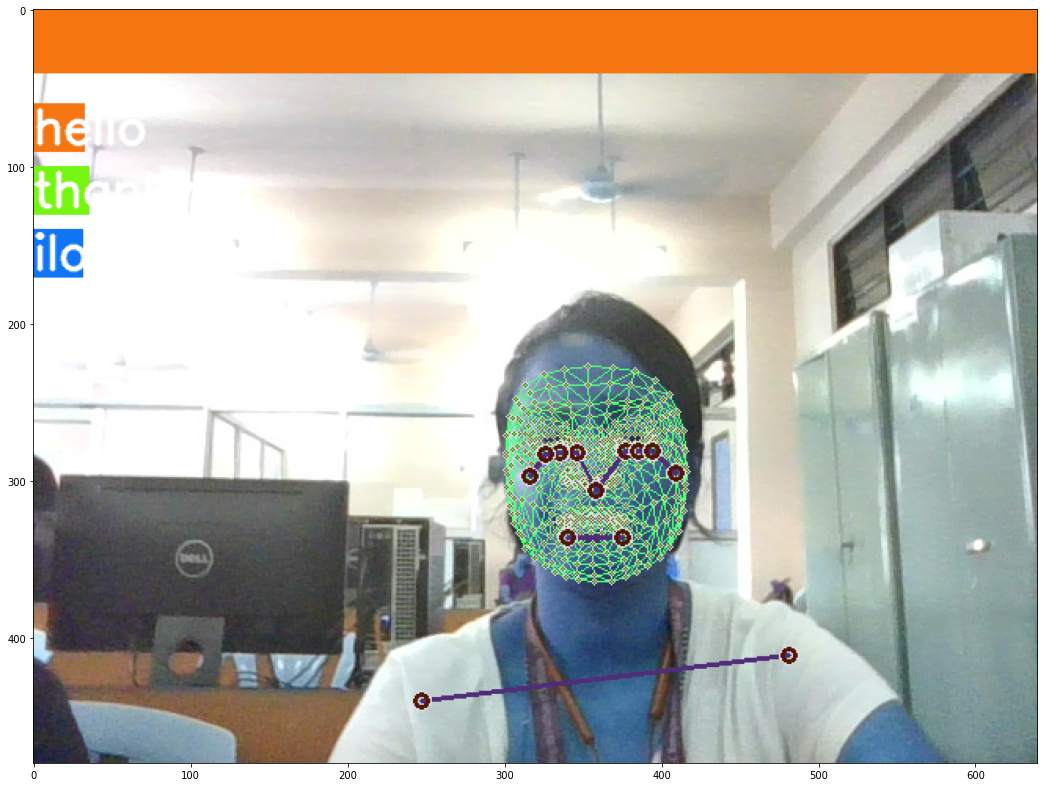

In [19]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [16]:
# New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_bas

thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.sol

thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutpu

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOu

In [101]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

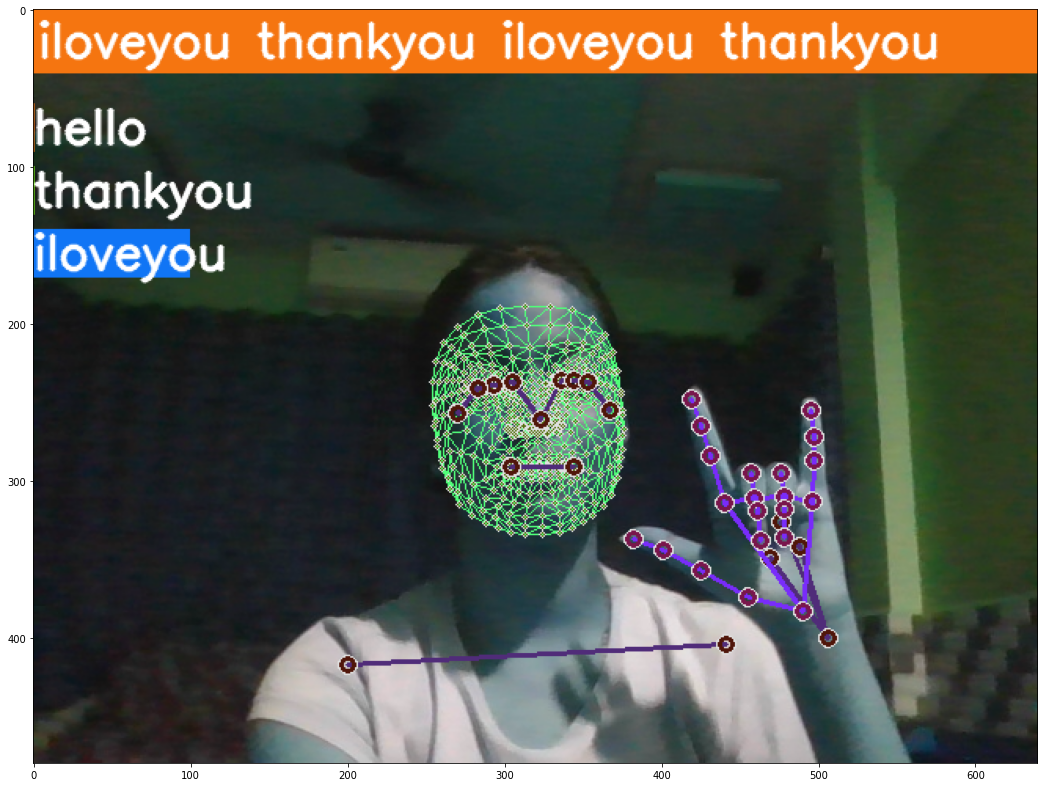

In [102]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

NameError: name 'cv2' is not defined